In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
import os 
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


def plot_classification_report(classification_report, cmap='coolwarm'):
    """
    Plots a heatmap of a classification report.
    
    Parameters:
    classification_report (dict): The classification report as a dictionary, typically output from sklearn.metrics.classification_report.
    cmap (str): The colormap for the heatmap. Default is 'coolwarm'.
    """
    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(classification_report).transpose()
    
    # Set the plot size
    plt.figure(figsize=(10, 5))
    
    # Plot the heatmap
    sns.heatmap(report_df, annot=True, cmap=cmap, fmt='.2f', linewidths=.5, cbar_kws={'label': 'Score'})
    
    # Set the labels and title
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report')
    
    # Display the plot
    plt.show()

## Select only data from sign up form

In [8]:
# Load your dataframe
dataset_name = "StrevonExport_final.csv"
data_dir = r"C:\Users\peter\Projects\HR_Forecasting\data"
df = pd.read_csv(os.path.join(data_dir, dataset_name))


# Remove stage, status, groupid
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
cols = [col for col in cols if "GroupTitle" not in col]
cols = [col for col in cols if "StageTitle" not in col]

df = df[cols]

In [9]:
cols = [col for col in df.columns.to_list() if "uitkomstTelefonischContact" not in col]
df = df[cols]

In [10]:
# fill missings 999
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
class_names = ["dropout", "starter"]


## create model 

c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       790
           1       0.26      0.75      0.39        28

    accuracy                           0.92       818
   macro avg       0.62      0.84      0.67       818
weighted avg       0.97      0.92      0.94       818



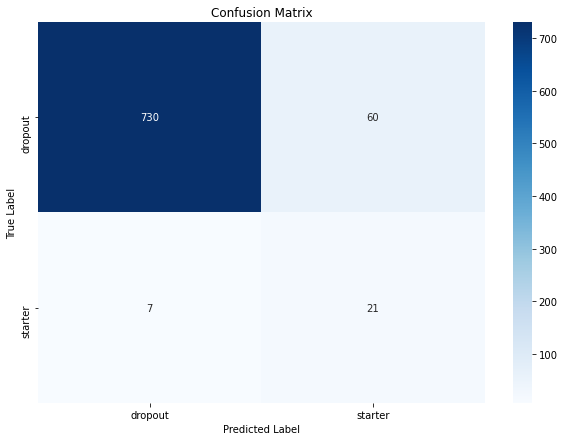

In [11]:
# Initialize and train the Balanced Random Forest model
brf = BalancedRandomForestClassifier(n_estimators=80, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print('Classification Report:')
cr = classification_report(y_test, y_pred)
print(cr)


# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)

c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter

Classification Report with RFE:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       790
           1       0.44      0.79      0.56        28

    accuracy                           0.96       818
   macro avg       0.72      0.88      0.77       818
weighted avg       0.97      0.96      0.96       818



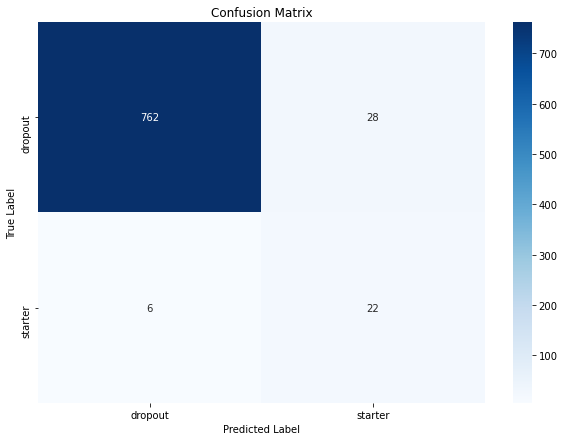

In [12]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=brf, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Transform the dataset with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Balanced Random Forest with selected features
brf.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = brf.predict(X_test_rfe)
y_proba_rfe = brf.predict_proba(X_test_rfe)[:, 1]

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
plot_confusion_matrix(cm_rfe, class_names)

# # Calculate and print additional metrics
# roc_auc_rfe = roc_auc_score(y_test, y_proba_rfe)
# print(f'ROC-AUC with RFE: {roc_auc_rfe:.2f}')


Classification Report with RFE:
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       790
           1       0.07      0.96      0.13        28

    accuracy                           0.54       818
   macro avg       0.53      0.74      0.41       818
weighted avg       0.97      0.54      0.67       818



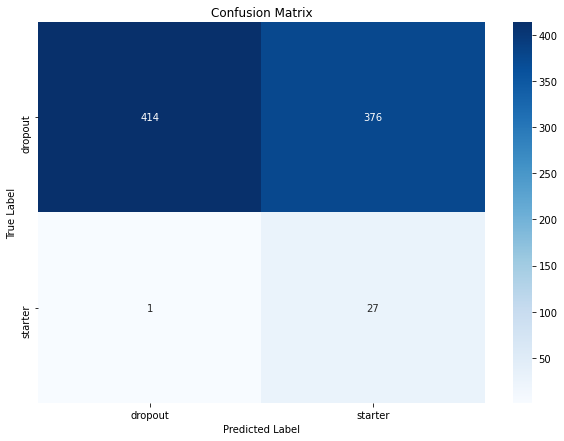

In [19]:
threshold = 0.15
y_pred_custom = (y_proba_rfe >= threshold).astype(int)

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_custom))

cm_rfe = confusion_matrix(y_test, y_pred_custom)
plot_confusion_matrix(cm_rfe, class_names)

In [13]:
print(f"number of candidates: {len(df)}")
print(f"number of columns: {len(df.columns)}")

number of candidates: 4088
number of columns: 438


In [14]:
selected_features = X_train.columns[rfe.support_].tolist()
selected_features

['cdate',
 'belafspraak',
 'leeftijd',
 'geboortedatum',
 'Verloning marge stopper of W&S overname',
 'Overname bedrag (W&S)',
 'berekening',
 'diff_days',
 'Voorkeursbranche_elektrotechniek',
 'Voorkeursbranche_installatietechniek']

In [15]:
from datetime import datetime
meta_dict = {"model_type":"brf_rfe",
               "date_created":str(datetime.today().date()),
               "selected_features": selected_features,
               "all_columns": df.columns.to_list(),
               "data_selection": "post_form",
                "dataset":dataset_name}
import json 
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_1_meta.json', "w") as file:
    json.dump(meta_dict, file)

import pickle
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_1.pkl', 'wb') as file:
    pickle.dump(brf, file)
